In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from sklearn.preprocessing import OrdinalEncoder
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

#Data Loading

In [124]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [125]:
train_df = pd.read_csv('/content/House_Price_Prediction_train.csv')

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [126]:
test_df = pd.read_csv('/content/House_Price_Prediction_test.csv')

In [ ]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [127]:
print("shape of train: ",train_df.shape)
print("shape of test: ",test_df.shape)

shape of train:  (1460, 81)
shape of test:  (1459, 80)


In [128]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# @title Know Your Data
#upon going through the data description we can list out features that seem crucial to deciding the house price
# Neighbourhood
# OverallQual
# OverallCond
# YearBuilt
# Foundation*
# Electrical
# KitchenQual
# GarageType
# GarageFinish
# Fence

#We need to know about our ordinal features before we go about encoding them

#Data Integration
It is the step in which we combine data from different sources.
Here we'll just merge our train and test data for the purpose of preprocessing.

In [129]:
df = pd.concat([train_df, test_df], axis=0)

In [130]:
df.shape

(2919, 81)

In [131]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [132]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


Lets get brief info about the dataset

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [ ]:
#Features with lot of null values
# Alley
# PoolQC
# Fireplace Qu
# Fence
# MiscFeature

In [134]:
int_features = df.select_dtypes(include=['int64']).columns
print("no. of integer features: ", len(int_features))
print("integer features are: ", int_features.to_list())

no. of integer features:  26
integer features are:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [135]:
float_features = df.select_dtypes(include=['float64']).columns
print("no. of float features: ", len(float_features))
print("float features are: ", float_features.to_list())

no. of float features:  12
float features are:  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [136]:
categorical_features = df.select_dtypes(include=['object']).columns
print("no. of categorical features: ", len(categorical_features))
print("categorical features are: ", categorical_features.to_list())

no. of categorical features:  43
categorical features are:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


#Getting Statistical Info from Data

In [137]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [138]:
df.describe().shape

(8, 38)

#Data Cleaning


In [ ]:
#Handling missing values

<Axes: >

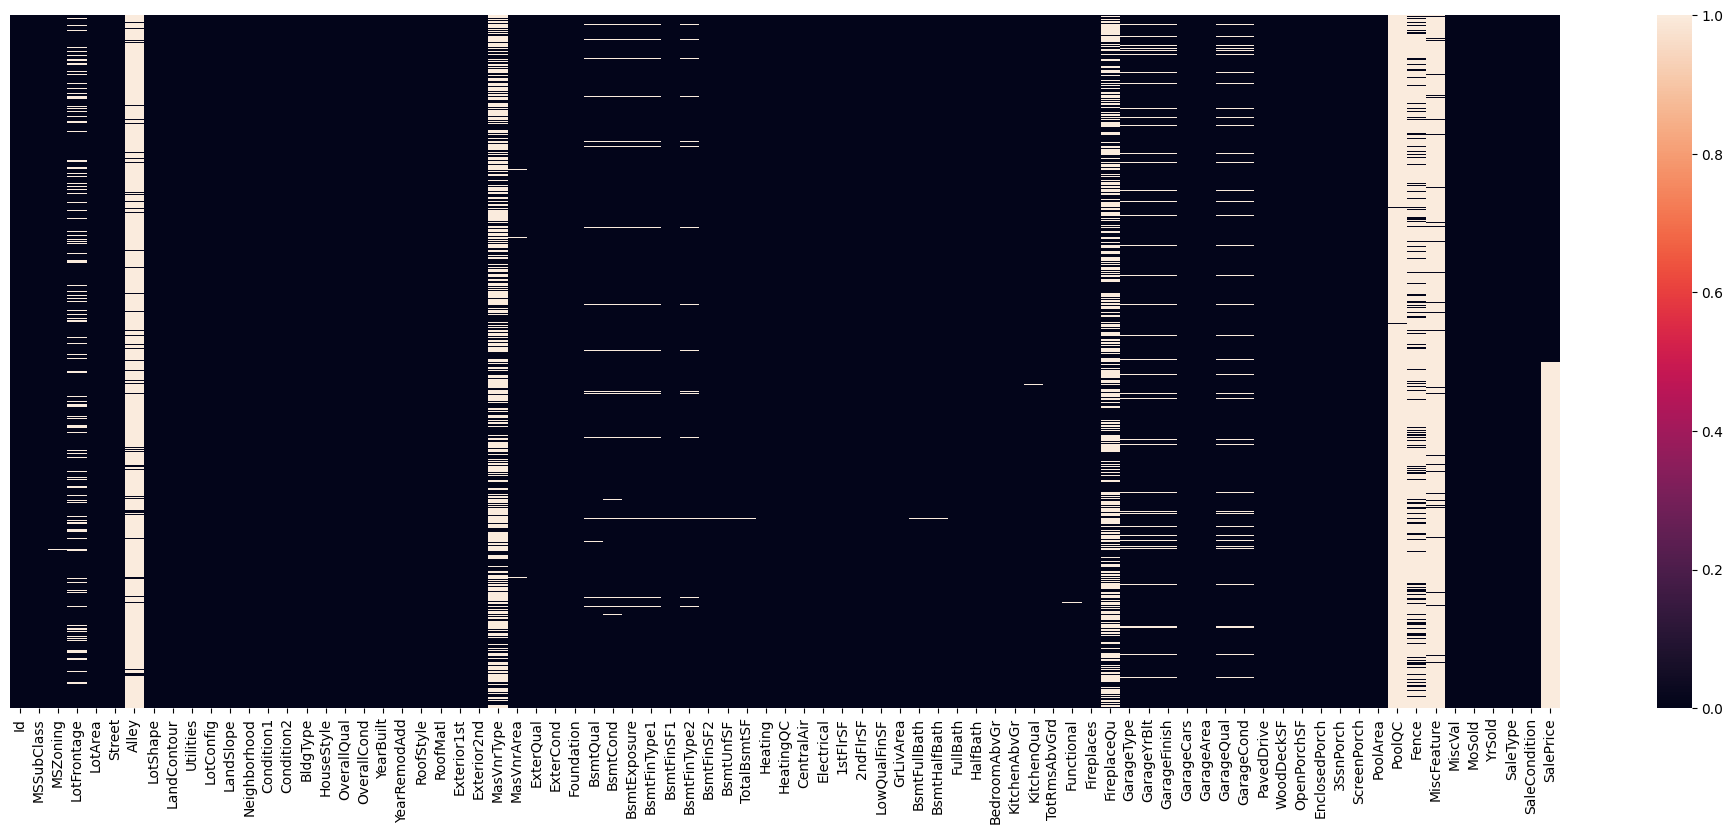

In [139]:
plt.figure(figsize = (25,9))
sns.heatmap(df.isna(), yticklabels=False)

In [140]:
df = df.set_index('Id')

In [141]:
#we can rid of columns with very high missing value percentage
null_count = df.isna().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [142]:
null_percent = df.isna().sum()/df.shape[0]*100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

In [ ]:
#we dont necessarily need to remove every feature with missing values--> if we can fill a feature with values on the basis
#of data and available features

In [143]:
features_with_more_than_50percent_missing_values = null_percent[null_percent>50]
features_with_more_than_50percent_missing_values

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [144]:
features_with_more_than_50percent_missing_values.index.to_list()

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
#we will not remove the above features because of the domain knowledge that we have
#basically these columns have null values because these features have NA as a value
# for eg. -> poolquality is na if there is no pool
#so these are technically not missing values and hence we will not remove them
#instead put some constant value in place of NA values

In [145]:
features_with_20_to_50_percent_missing_values = null_percent[((null_percent>25) & (null_percent<50))]
features_with_20_to_50_percent_missing_values

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [ ]:
#sale price is okay
#fireplaceQu has null value when there is no fireplace

In [146]:
features_with_5_to_20_percent_missing_values = null_percent[((null_percent>5) & (null_percent<20))]
features_with_5_to_20_percent_missing_values

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [ ]:
#LotFrontage can be replaced as it is an important feature

# GarageType       5.378554 --> has NA value if "no garage"
# GarageYrBlt      5.447071 --> hence no year built
# GarageFinish     5.447071 -->same
# GarageQual       5.447071 -->same
# GarageCond       5.447071-->same

#So we cant remove these features either

In [ ]:
#conclusion is no feature to be dropped -- we'll impute missing values

#Missing value imputation

In [147]:
missing_value_features = null_percent[null_percent>0]
missing_value_features

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [148]:
categorical_features_with_missing_values = missing_value_features[missing_value_features.keys().isin(categorical_features)]
print(len(categorical_features_with_missing_values))
print(categorical_features_with_missing_values) #23 features

23
MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64


In [149]:
float_features_with_missing_values = missing_value_features[missing_value_features.keys().isin(float_features)]
print(len(float_features_with_missing_values))
print(float_features_with_missing_values) # 12 float features

12
LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64


In [150]:
#imputing MSZoning - with mode

df['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='MSZoning', ylabel='count'>

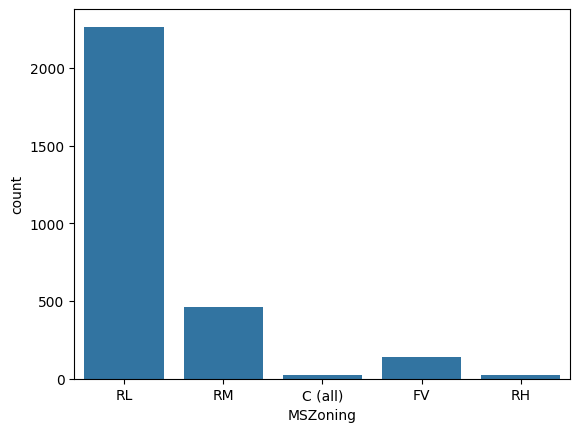

In [ ]:
sns.countplot(x = df['MSZoning'])

In [151]:
MSZoning_mode = df['MSZoning'].mode()[0]
MSZoning_mode

'RL'

In [152]:
#creating copy of dataset to perform imputations - in order to handle anything that might go wrong
df_copy = df.copy()

In [153]:
df_copy['MSZoning'] = df_copy['MSZoning'].fillna(MSZoning_mode)
df_copy['MSZoning'].isna().sum()

0

In [154]:
#for categorical features
def old_vs_new_count_plot(df, df_new, feature):
  plt.figure(figsize = (11,5))
  plt.subplot(121)
  plt.title("Old Distrbution")
  sns.countplot(x=df[feature])
  plt.subplot(122)
  plt.title("New Distrbution")
  sns.countplot(x=df_new[feature])

In [155]:
#for numerical features
def old_vs_new_plots(df, df_new, feature):
  plt.figure(figsize = (16,9))
  plt.subplot(221)
  plt.title("Old Distrbution")
  sns.boxplot(df[feature])
  plt.subplot(222)
  plt.title("Old Distrbution")
  sns.histplot(x=df[feature], kde=True)


  plt.subplot(223)
  plt.title("New Distrbution")
  sns.boxplot(df_new[feature])
  plt.subplot(224)
  plt.title("New Distrbution")
  sns.histplot(x=df_new[feature], kde=True)

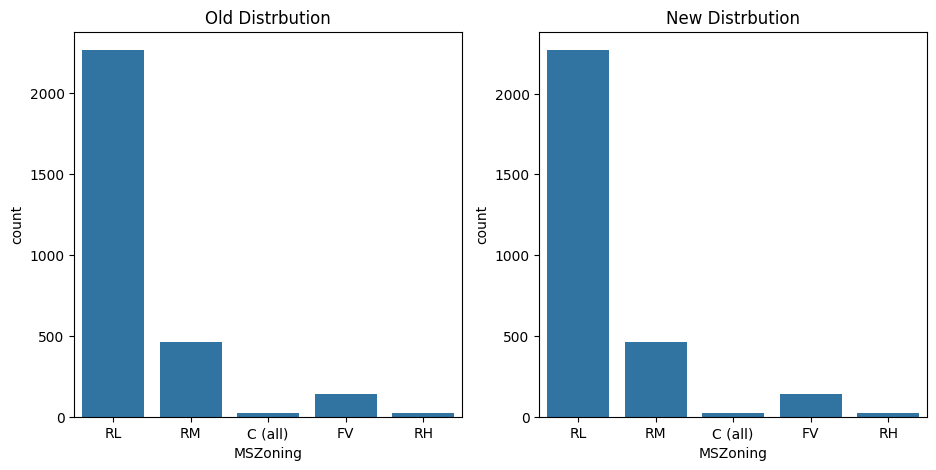

In [156]:
old_vs_new_count_plot(df, df_copy,'MSZoning')

In [157]:
#imputing Alley
df_copy['Alley'].value_counts() # we it NA value as a valid value

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [158]:
alley_value="NA"
df_copy['Alley'] = df_copy['Alley'].fillna(alley_value)
df_copy['Alley'].isna().sum()

0

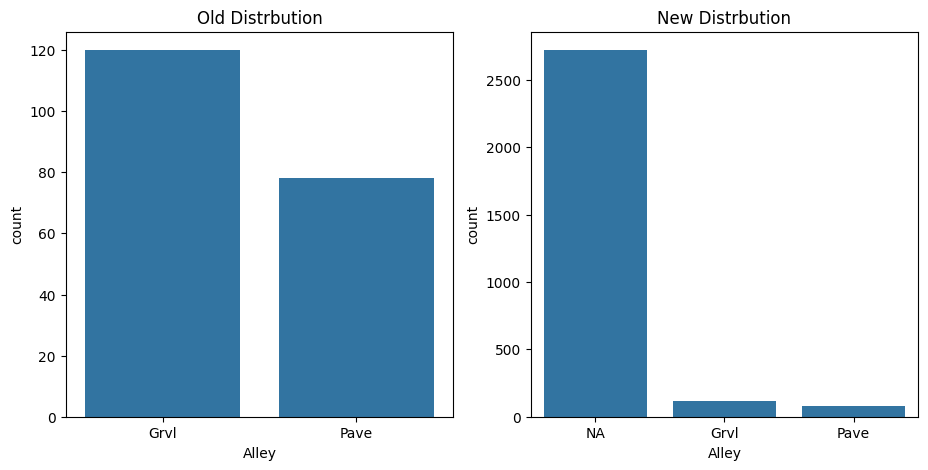

In [159]:
old_vs_new_count_plot(df, df_copy,'Alley')

In [160]:
#imputing Utilities
df_copy['Utilities'].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [161]:
utilities_mode = df_copy['Utilities'].mode()[0]
df_copy['Utilities'] = df_copy['Utilities'].fillna(utilities_mode)
df_copy['Utilities'].isna().sum()

0

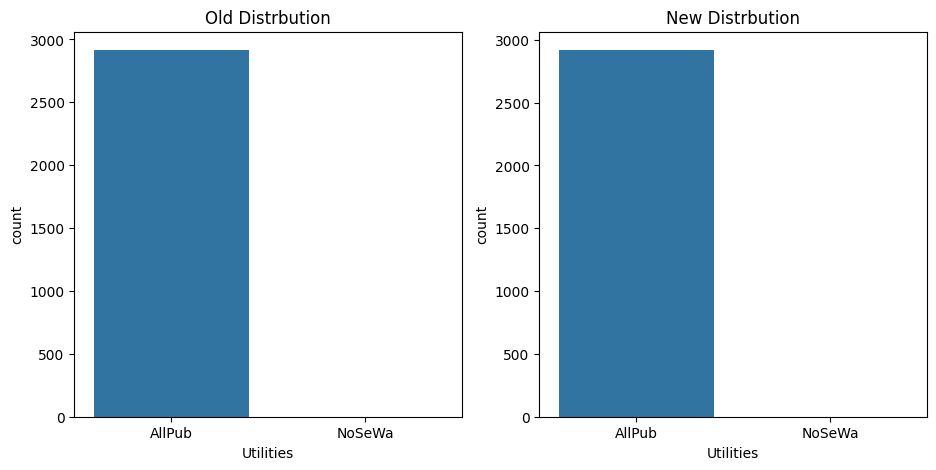

In [162]:
old_vs_new_count_plot(df, df_copy,'Utilities')

In [163]:
#imputing Exterior1st & Exterior2nd
df_copy['Exterior1st'].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [164]:
df_copy['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [165]:
Exterior1st_mode = df_copy['Exterior1st'].mode()[0]
Exterior2nd_mode = df_copy['Exterior2nd'].mode()[0]

df_copy['Exterior1st'] = df_copy['Exterior1st'].fillna(Exterior1st_mode)
df_copy['Exterior2nd'] = df_copy['Exterior2nd'].fillna(Exterior2nd_mode)

print(df_copy['Exterior1st'].isna().sum())
print(df_copy['Exterior2nd'].isna().sum())

0
0


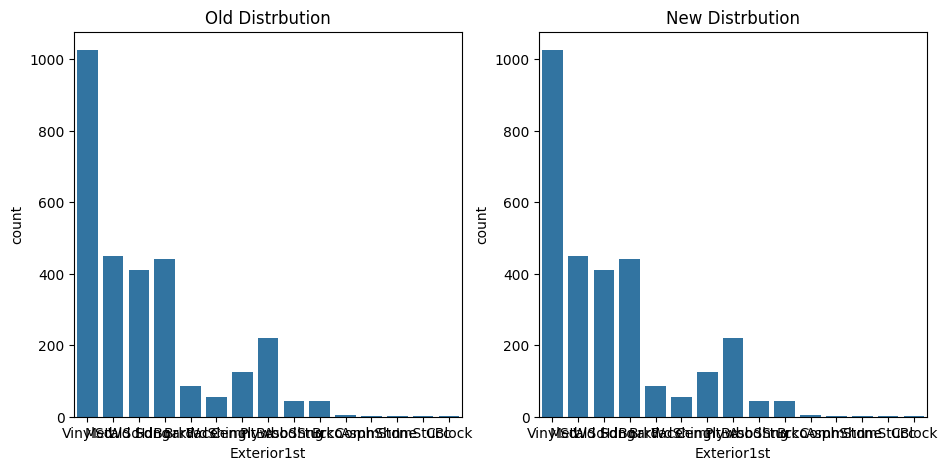

In [166]:
old_vs_new_count_plot(df, df_copy,'Exterior1st')

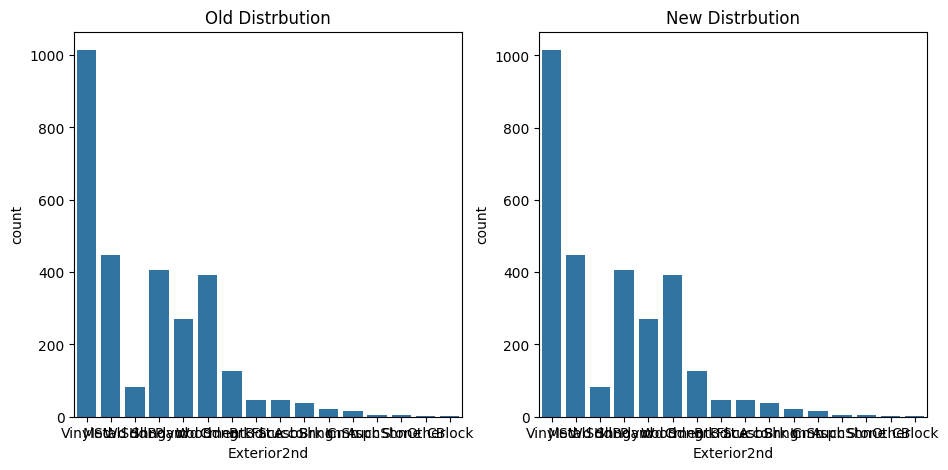

In [167]:
old_vs_new_count_plot(df, df_copy,'Exterior2nd')

In [168]:
#Imputing LotFrontage
def plots(df, feature, figsize=(8,5)):
  plt.figure(figsize=figsize)
  plt.subplot(121)
  sns.boxplot(df[feature])
  plt.subplot(122)
  sns.histplot(df[feature], kde=True)

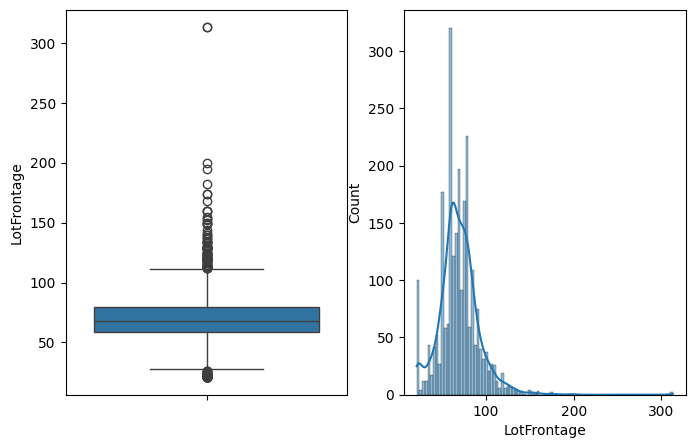

In [169]:
plots(df_copy, 'LotFrontage')

In [170]:
#there are outliers so we'll use median
LotFrontage_median = df['LotFrontage'].median()
LotFrontage_median

68.0

In [171]:
df_copy['LotFrontage'] = df_copy['LotFrontage'].fillna(LotFrontage_median)
df_copy['LotFrontage'].isna().sum()

0

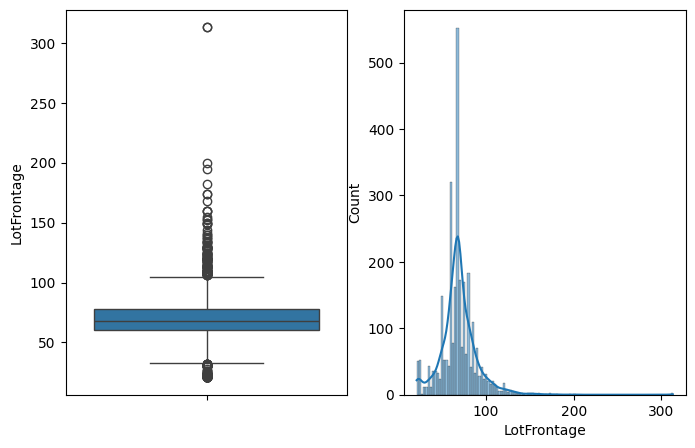

In [172]:
plots(df_copy, 'LotFrontage')

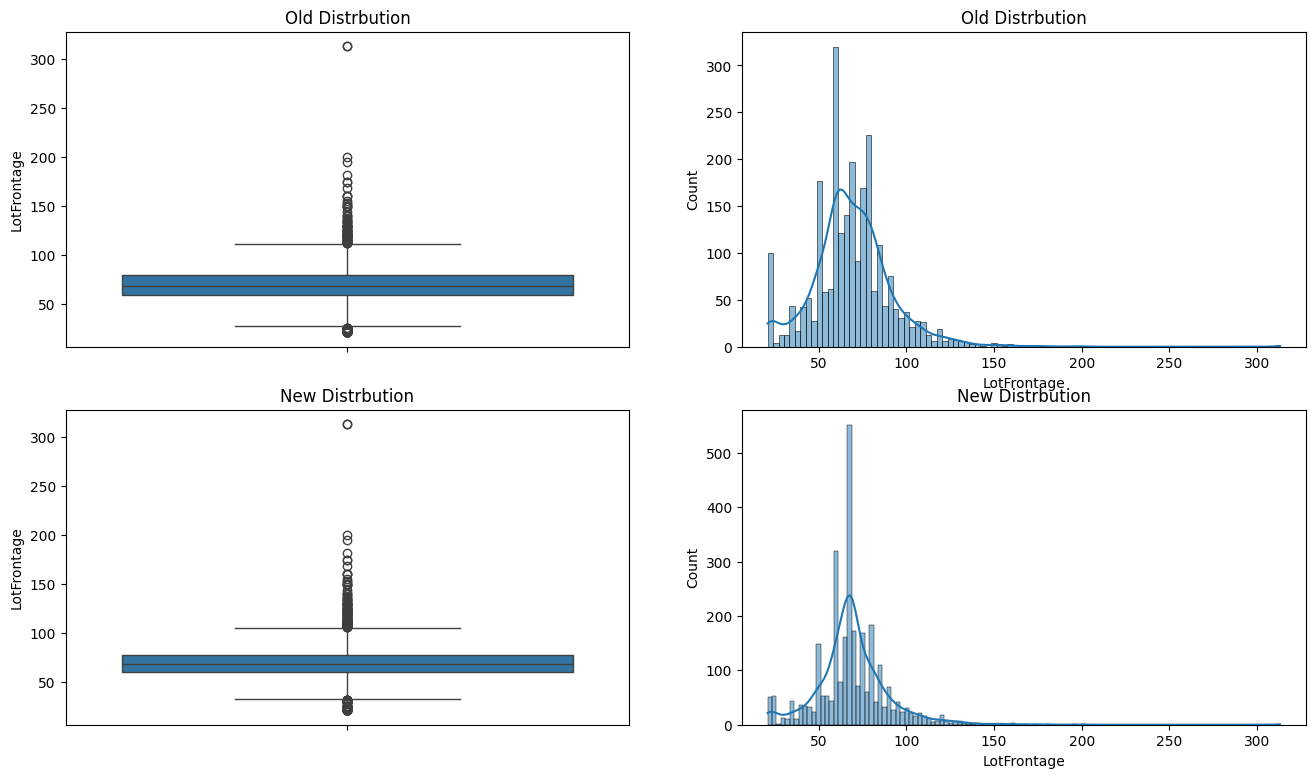

In [173]:
old_vs_new_plots(df, df_copy, 'LotFrontage')

In [174]:
#MasVnrType
df_copy['MasVnrType'].value_counts() #has none as a value so replace np.nan with 'NA'

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [175]:
MasVnrType_value = "NA"
df_copy['MasVnrType'] = df_copy['MasVnrType'].fillna(MasVnrType_value)
df_copy['MasVnrType'].isna().sum()

0

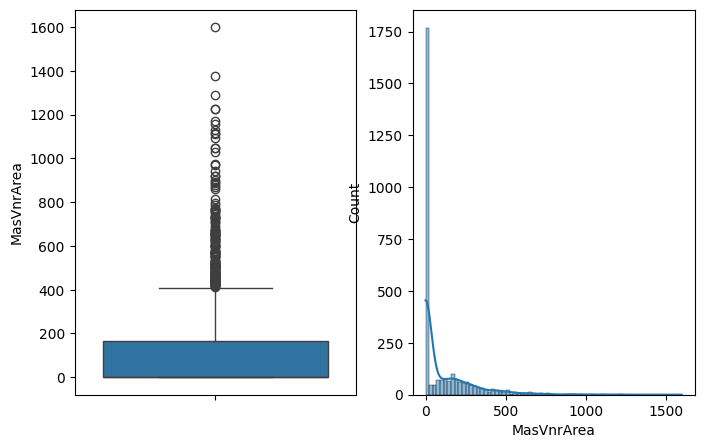

In [176]:
#MasVnrArea -- numerical
plots(df_copy, 'MasVnrArea')

In [177]:
MasVnrArea_median=df_copy['MasVnrArea'].median()
MasVnrArea_median

0.0

In [178]:
df_copy['MasVnrArea'] = df_copy['MasVnrArea'].fillna(MasVnrArea_median)
df_copy['MasVnrArea'].isna().sum()

0

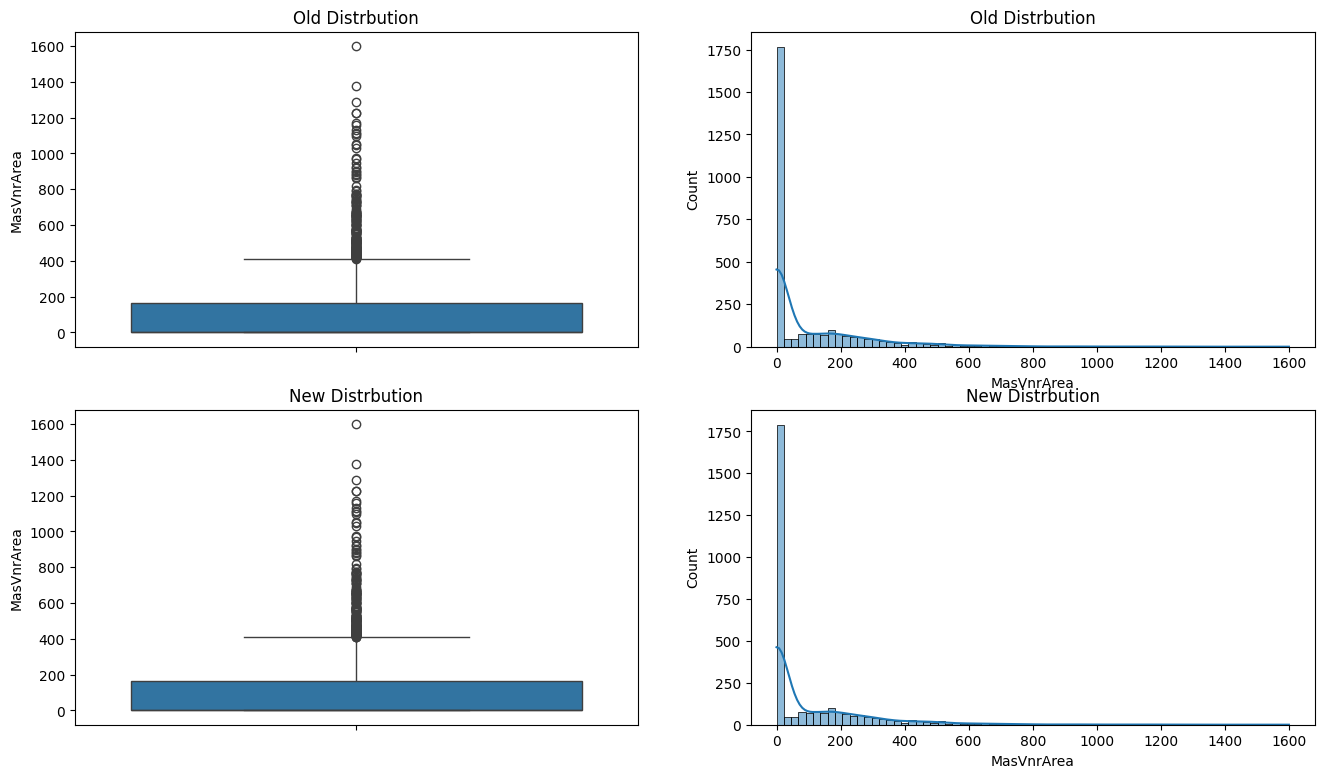

In [179]:
old_vs_new_plots(df, df_copy, 'MasVnrArea')

In [180]:
#Handling below features
#cat
# BsmtQual         2.774923
# BsmtCond         2.809181
# BsmtExposure     2.809181
# BsmtFinType1     2.706406
# BsmtFinType2     2.740665

# #num
# BsmtFinSF1       0.034258
# BsmtFinSF2       0.034258
# BsmtUnfSF        0.034258
# TotalBsmtSF      0.034258
# BsmtFullBath     0.068517
# BsmtHalfBath     0.068517

#They are related because all the categorical ones have no basement as a category which implies the missing value

In [181]:
print("BsmtQual: ",df_copy['BsmtQual'].value_counts())
print("BsmtCond: ",df_copy['BsmtCond'].value_counts())
print("BsmtExposure: ",df_copy['BsmtExposure'].value_counts())
print("BsmtFinType1: ",df_copy['BsmtFinType1'].value_counts())
print("BsmtFinType2: ",df_copy['BsmtFinType2'].value_counts())


BsmtQual:  BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
BsmtCond:  BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
BsmtExposure:  BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
BsmtFinType1:  BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
BsmtFinType2:  BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [182]:
BsmtQual_value = "NA"
BsmtCond_value = "NA"
BsmtExposure_value = "NA"
BsmtFinType1_value = "NA"
BsmtFinType2_value = "NA"

df_copy['BsmtQual'] = df_copy['BsmtQual'].fillna(BsmtQual_value)
df_copy['BsmtCond'] = df_copy['BsmtCond'].fillna(BsmtCond_value)
df_copy['BsmtExposure'] = df_copy['BsmtExposure'].fillna(BsmtExposure_value)
df_copy['BsmtFinType1'] = df_copy['BsmtFinType1'].fillna(BsmtFinType1_value)
df_copy['BsmtFinType2'] = df_copy['BsmtFinType2'].fillna(BsmtFinType2_value)

df_copy['BsmtQual'].isna().sum()
df_copy['BsmtCond'].isna().sum()
df_copy['BsmtExposure'].isna().sum()
df_copy['BsmtFinType1'].isna().sum()
df_copy['BsmtFinType2'].isna().sum()


0

In [183]:
num_bsmt = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']

In [184]:
#since there an no basements in certain cases these values will take null values -- we can replace them with zeroes
BsmtFinSF1_value=0
BsmtFinSF2_value=0
BsmtUnfSF_value=0
TotalBsmtSF_value=0
BsmtFullBath_value=0
BsmtHalfBath_value=0

df_copy['BsmtFinSF1'] = df_copy['BsmtFinSF1'].fillna(BsmtFinSF1_value)
df_copy['BsmtFinSF2'] = df_copy['BsmtFinSF2'].fillna(BsmtFinSF2_value)
df_copy['BsmtUnfSF'] = df_copy['BsmtUnfSF'].fillna(BsmtUnfSF_value)
df_copy['TotalBsmtSF'] = df_copy['TotalBsmtSF'].fillna(TotalBsmtSF_value)
df_copy['BsmtFullBath'] = df_copy['BsmtFullBath'].fillna(BsmtFullBath_value)
df_copy['BsmtHalfBath'] = df_copy['BsmtHalfBath'].fillna(BsmtHalfBath_value)


df_copy['BsmtFinSF1'].isna().sum()
df_copy['BsmtQual'].isna().sum()
df_copy['BsmtUnfSF'].isna().sum()
df_copy['TotalBsmtSF'].isna().sum()
df_copy['BsmtFullBath'].isna().sum()
df_copy['BsmtHalfBath'].isna().sum()


0

In [185]:
#KitchenQual and Electrical
print("Electrical: ", df_copy['Electrical'].value_counts())
print("KitchenQual: ", df_copy['KitchenQual'].value_counts())


Electrical:  Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64
KitchenQual:  KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64


In [186]:
#since there is no pattern there we'll impute mode values
Electrical_mode = df_copy['Electrical'].mode()[0]
KitchenQual_mode = df_copy['KitchenQual'].mode()[0]

df_copy['Electrical'] = df_copy['Electrical'].fillna(Electrical_mode)
df_copy['KitchenQual'] = df_copy['KitchenQual'].fillna(KitchenQual_mode)

df_copy['Electrical'].isna().sum()
df_copy['KitchenQual'].isna().sum()

0

In [59]:
# all categorical - we'll impute them now
# Functional  -- mode
# FireplaceQu  -- has NA as a value -- no fireplace
# PoolQC      -- has NA as a value -- no pool
# Fence          -- has NA as a value -- no fence
# MiscFeature    -- has NA as a value -- for none
# SaleType      --mode

In [187]:
print("Functional: ", df_copy['Functional'].value_counts())
print("FireplaceQu: ", df_copy['FireplaceQu'].value_counts())
print("PoolQC: ", df_copy['PoolQC'].value_counts())
print("Fence: ", df_copy['Fence'].value_counts())
print("MiscFeature: ", df_copy['MiscFeature'].value_counts())
print("SaleType: ", df_copy['SaleType'].value_counts())


Functional:  Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64
FireplaceQu:  FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
PoolQC:  PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
Fence:  Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
MiscFeature:  MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64
SaleType:  SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64


In [188]:
Functional_mode = df_copy['Functional'].mode()[0]
SaleType_mode = df_copy['SaleType'].mode()[0]
FireplaceQu_value = "NA"
PoolQC_value="NA"
Fence_value ="NA"
MiscFeature_value = "NA"

df_copy['Functional'] = df_copy['Functional'].fillna(Functional_mode)
df_copy['SaleType'] = df_copy['SaleType'].fillna(SaleType_mode)
df_copy['FireplaceQu'] = df_copy['FireplaceQu'].fillna(FireplaceQu_value)
df_copy['PoolQC'] = df_copy['PoolQC'].fillna(PoolQC_value)
df_copy['Fence'] = df_copy['Fence'].fillna(Fence_value)
df_copy['MiscFeature'] = df_copy['MiscFeature'].fillna(MiscFeature_value)

df_copy['Functional'].isna().sum()
df_copy['SaleType'].isna().sum()
df_copy['FireplaceQu'].isna().sum()
df_copy['PoolQC'].isna().sum()
df_copy['Fence'].isna().sum()
df_copy['MiscFeature'].isna().sum()



0

In [189]:
#categorical
# GarageType   -- NA for no Garage
# GarageFinish     -- NA for no Garage
# GarageQual       -- NA for no Garage
# GarageCond      -- NA for no Garage

#numerical
# GarageYrBlt      0 if no garage
# GarageCars       0 if no garage
# GarageArea       0 if no garage


In [190]:
print("GarageType: ", df_copy['GarageType'].value_counts())
print("GarageFinish: ", df_copy['GarageFinish'].value_counts())
print("GarageQual: ", df_copy['GarageQual'].value_counts())
print("GarageCond: ", df_copy['GarageCond'].value_counts())

GarageType:  GarageType
Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64
GarageFinish:  GarageFinish
Unf    1230
RFn     811
Fin     719
Name: count, dtype: int64
GarageQual:  GarageQual
TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: count, dtype: int64
GarageCond:  GarageCond
TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: count, dtype: int64


In [191]:
GarageType_value = "NA"
GarageFinish_value="NA"
GarageQual_value ="NA"
GarageCond_value = "NA"

df_copy['GarageType'] = df_copy['GarageType'].fillna(GarageType_value)
df_copy['GarageFinish'] = df_copy['GarageFinish'].fillna(GarageFinish_value)
df_copy['GarageQual'] = df_copy['GarageQual'].fillna(GarageQual_value)
df_copy['GarageCond'] = df_copy['GarageCond'].fillna(GarageCond_value)

df_copy['GarageType'].isna().sum()
df_copy['GarageFinish'].isna().sum()
df_copy['GarageQual'].isna().sum()
df_copy['GarageCond'].isna().sum()

0

In [192]:
num_garage = ['GarageYrBlt', 'GarageCars', 'GarageArea']
cat_garage = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

df_garage = df[num_garage+cat_garage]
df_garage[df_garage.isna().any(axis=1)]

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
Id,,,,,,,
40,NaN,0.0,0.0,NaN,NaN,NaN,NaN
49,NaN,0.0,0.0,NaN,NaN,NaN,NaN
79,NaN,0.0,0.0,NaN,NaN,NaN,NaN
89,NaN,0.0,0.0,NaN,NaN,NaN,NaN
90,NaN,0.0,0.0,NaN,NaN,NaN,NaN
100,NaN,0.0,0.0,NaN,NaN,NaN,NaN
109,NaN,0.0,0.0,NaN,NaN,NaN,NaN
126,NaN,0.0,0.0,NaN,NaN,NaN,NaN
128,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [193]:
num_garage = ['GarageYrBlt', 'GarageCars', 'GarageArea']

GarageYrBlt_value=0
GarageCars_value=0
GarageArea_value=0

df_copy['GarageYrBlt'] = df_copy['GarageYrBlt'].fillna(GarageYrBlt_value)
df_copy['GarageCars'] = df_copy['GarageCars'].fillna(GarageCars_value)
df_copy['GarageArea'] = df_copy['GarageArea'].fillna(GarageArea_value)

df_copy['GarageYrBlt'].isna().sum()
df_copy['GarageCars'].isna().sum()
df_copy['GarageArea'].isna().sum()


0

In [194]:
df_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000.0


In [74]:
df_copy.to_csv("Imputed_df.csv")

#Feature Transformation
1. Converting numerical to categorical features

In [195]:
for_num_conv=['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold','YrSold'] #upon seeing the desc we have decided that they should be converted to categories


In [197]:
for feature in for_num_conv:
  print(feature, ": ", df_copy[feature].dtype)

MSSubClass :  int64
YearBuilt :  int64
YearRemodAdd :  int64
GarageYrBlt :  float64
MoSold :  int64
YrSold :  int64


In [198]:
df[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [199]:
df['MoSold'].unique() # so we can map them to months

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [200]:
calendar.month_abbr[12]

'Dec'

In [201]:
df_copy['MoSold']=df_copy['MoSold'].apply(lambda x: calendar.month_abbr[x])

In [202]:
#let us convert remaining features to string values

In [203]:
temporal_features =['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'] #other than yrsold

for feature in temporal_features:
  df_copy[feature] = df_copy['YrSold']- df_copy[feature] # this seemed more relevant

In [204]:
df[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [205]:
df_copy['YrSold'].unique() # we can convert YrSold to string

array([2008, 2007, 2006, 2009, 2010])

In [206]:
df_copy['YrSold']=df_copy['YrSold'].astype(str)

#Encoding Categorical Features

In [95]:
df_copy['OverallQual'].dtype

dtype('int64')

In [210]:
#all featurs where we have order among categories we'll have to perform ordinal encoding
ordinal_features = ['ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC',
'KitchenQual',
'FireplaceQu',
'GarageQual',
'GarageCond',
'PoolQC',
'Fence']

In [211]:
print(len(ordinal_features))

14


In [212]:
df_copy['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [213]:
categories = [['Po','Fa','TA','Gd', 'Ex']]
ExterQual_encoder = OrdinalEncoder(categories = categories)
df_copy['ExterQual'] = ExterQual_encoder.fit_transform(df_copy[['ExterQual']].values.reshape(-1,1))

In [214]:
df_copy['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [215]:
categories = [['Po','Fa','TA','Gd', 'Ex']]
ExterQual_encoder = OrdinalEncoder(categories = categories)
df_copy['ExterCond'] = ExterQual_encoder.fit_transform(df_copy[['ExterCond']].values.reshape(-1,1))

In [226]:
df_copy['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', 'NA'], dtype=object)

In [228]:
categories =['NA','No','Mn','Av','Gd']
df_copy['BsmtExposure'] = df_copy['BsmtExposure'].astype(CategoricalDtype(categories = categories, ordered=True)).cat.codes

In [230]:
df_copy['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'NA', 'Fa'], dtype=object)

In [231]:
df_copy['BsmtQual'] = df_copy['BsmtQual'].astype(CategoricalDtype(categories = ['NA','Po','Fa','TA','Gd', 'Ex'], ordered=True)).cat.codes
df_copy['BsmtCond'] = df_copy['BsmtCond'].astype(CategoricalDtype(categories = ['NA','Po','Fa','TA','Gd', 'Ex'], ordered=True)).cat.codes
df_copy['BsmtFinType1'] = df_copy['BsmtFinType1'].astype(CategoricalDtype(categories = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered=True)).cat.codes
df_copy['BsmtFinType2'] = df_copy['BsmtFinType2'].astype(CategoricalDtype(categories = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered=True)).cat.codes
df_copy['HeatingQC'] = df_copy['HeatingQC'].astype(CategoricalDtype(categories = ['Po','Fa','TA','Gd', 'Ex'], ordered=True)).cat.codes
df_copy['KitchenQual'] = df_copy['KitchenQual'].astype(CategoricalDtype(categories = ['Po','Fa','TA','Gd', 'Ex'], ordered=True)).cat.codes
df_copy['FireplaceQu'] = df_copy['FireplaceQu'].astype(CategoricalDtype(categories = ['NA','Po','Fa','TA','Gd', 'Ex'], ordered=True)).cat.codes
df_copy['GarageQual'] = df_copy['GarageQual'].astype(CategoricalDtype(categories = ['NA','Po','Fa','TA','Gd', 'Ex'], ordered=True)).cat.codes
df_copy['GarageCond'] = df_copy['GarageCond'].astype(CategoricalDtype(categories = ['NA','Po','Fa','TA','Gd', 'Ex'], ordered=True)).cat.codes
df_copy['PoolQC'] = df_copy['PoolQC'].astype(CategoricalDtype(categories = ['NA','Fa','TA','Gd', 'Ex'], ordered=True)).cat.codes
df_copy['Fence'] = df_copy['Fence'].astype(CategoricalDtype(categories = ['NA', 'MnWw','GdWo', 'MnPrv','GdPrv'], ordered=True)).cat.codes

In [232]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

#Encoding Nominal Features

In [240]:
nominal_features = df_copy.select_dtypes(include = ['object']).columns.to_list()
nominal_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [241]:
df_copy[nominal_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NA,Feb,2008,WD,Normal
2,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NA,CBlock,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NA,May,2007,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NA,Sep,2008,WD,Normal
4,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NA,BrkTil,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,NA,Feb,2006,WD,Abnorml
5,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NA,Dec,2008,WD,Normal


In [242]:
df_encoded = df_copy.copy()
df_encoded.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3.0,2.0,PConc,4,3,1,6,706.0,1,0.0,150.0,856.0,GasA,4,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,Typ,0,0,Attchd,5.0,RFn,2.0,548.0,3,3,Y,0,61,0,0,0,0,0,0,NA,0,Feb,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,NA,0.0,2.0,2.0,CBlock,4,3,4,5,978.0,1,0.0,284.0,1262.0,GasA,4,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,2,6,Typ,1,3,Attchd,31.0,RFn,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,0,NA,0,May,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3.0,2.0,PConc,4,3,2,6,486.0,1,0.0,434.0,920.0,GasA,4,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,3,6,Typ,1,3,Attchd,7.0,RFn,2.0,608.0,3,3,Y,0,42,0,0,0,0,0,0,NA,0,Sep,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,2.0,2.0,BrkTil,3,4,1,5,216.0,1,0.0,540.0,756.0,GasA,3,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,3,7,Typ,1,4,Detchd,8.0,Unf,3.0,642.0,3,3,Y,0,35,272,0,0,0,0,0,NA,0,Feb,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3.0,2.0,PConc,4,3,3,6,655.0,1,0.0,490.0,1145.0,GasA,4,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,3,9,Typ,1,3,Attchd,8.0,RFn,3.0,836.0,3,3,Y,192,84,0,0,0,0,0,0,NA,0,Dec,2008,WD,Normal,250000.0


In [244]:
print("Before Encoding:", df_encoded.shape)
df_encoded = pd.get_dummies(df_encoded, columns = nominal_features, prefix=nominal_features, drop_first =True)
print("After Encoding:", df_encoded.shape)


Before Encoding: (2919, 80)
After Encoding: (2919, 227)


In [247]:
df_encoded.select_dtypes(include = ['object']).columns.to_list()

[]

In [246]:
df_encoded.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,5,5,196.0,3.0,2.0,4,3,1,6,706.0,1,0.0,150.0,856.0,4,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,0,0,5.0,2.0,548.0,3,3,0,61,0,0,0,0,0,0,0,208500.0,False,False,True,False,True,True,False,False,False,True,False,False,True,False,False,False,False,True,False,Fa

In [249]:
df_encoded.to_csv("encoded_df.csv")

#Splitting data for training and testing

In [255]:
print(train_df.shape)
print(test_df.shape)
train_len = train_df.shape[0]
print(train_len)

(1460, 81)
(1459, 80)
1460


In [295]:
x_train = df_encoded[:train_len].drop(columns = ['SalePrice'],axis=1)
y_train = df_encoded['SalePrice'][:train_len]
x_test = df_encoded[train_len:].drop(columns = ['SalePrice'],axis=1)

print('shape of x_train: ',x_train.shape)
print('shape of y_train: ',y_train.shape)
print('shape of x_test: ',x_test.shape)


shape of x_train:  (1460, 226)
shape of y_train:  (1460,)
shape of x_test:  (1459, 226)


#Scaling Data


In [296]:
sc = StandardScaler()
sc.fit(x_train)

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

#Model Training

In [302]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPRegressor

In [308]:
svr_model = SVR()
lr_model = LinearRegression()
sgd_model = SGDRegressor()
dtr_model = DecisionTreeRegressor()
knr_model = KNeighborsRegressor()
gpr_model = GaussianProcessRegressor()
rfr_model = RandomForestRegressor()
gbr_model = GradientBoostingRegressor()
xgb_model = XGBRegressor()
mlp_model = MLPRegressor()
ridge_model=Ridge()
lasso_model=Lasso()

In [309]:
models = [svr_model, lr_model, sgd_model, dtr_model, knr_model, gpr_model, rfr_model, gbr_model, xgb_model,mlp_model, ridge_model, lasso_model]

In [310]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=x_train, y_train=y_train):
    cv = KFold(n_splits = 5, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [311]:
scores = []
for model in models:
  print("Model -> ", model)
  score = test_model(model, x_train, y_train)
  print("Score: ", score)
  scores.append([model, score])

Model ->  SVR()
Score:  [-0.053325472315860135]
Model ->  LinearRegression()
Score:  [-2.0929067786411853e+22]
Model ->  SGDRegressor()
Score:  [-528.8979490595075]
Model ->  DecisionTreeRegressor()
Score:  [0.7255374647617046]
Model ->  KNeighborsRegressor()
Score:  [0.6847939075401637]
Model ->  GaussianProcessRegressor()
Score:  [-5.2846859374046815]
Model ->  RandomForestRegressor()
Score:  [0.8479449098589583]
Model ->  GradientBoostingRegressor()
Score:  [0.8781108594061541]
Model ->  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Score:  [-4.965896144751735]
Model ->  Ridge()
Score:  [0.6789674461833148]
Model ->  Lasso()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.416e+11, tolerance: 7.318e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.087e+11, tolerance: 7.570e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.077e+11, tolerance: 7.688e

Score:  [0.6558512447458323]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.965e+11, tolerance: 7.342e+08
  model = cd_fast.enet_coordinate_descent(


In [307]:
scores

[[LinearRegression(), [-2.0929067786411853e+22]],
 [SGDRegressor(), [-298.7902466810741]],
 [DecisionTreeRegressor(), [0.7117041326726291]],
 [KNeighborsRegressor(), [0.6847939075401637]],
 [GaussianProcessRegressor(), [-5.2846859374046815]],
 [RandomForestRegressor(), [0.8550197123182132]],
 [GradientBoostingRegressor(), [0.8786017248157943]],
 [XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               

#Hyper Parameter Tuning

In [312]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'kernel': ['rbf'],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
         'C': [0.1, 1, 10, 100, 1000],
         'epsilon': [1, 0.2, 0.1, 0.01, 0.001, 0.0001]}
rand_search = RandomizedSearchCV(svr_model, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(x_train, y_train)
rand_search.best_score_

0.005747810171593274

In [316]:
xgb2_reg=XGBRegressor(n_estimators= 899,
 max_depth= 4,
 learning_rate= 0.05,
 booster= 'gbtree')

test_model(xgb2_reg)

[0.8800633141303864]

In [318]:
param_grid = {
    'n_estimators': [899],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=5,n_jobs=-1)
grid_search.fit(x_train, y_train)
grid_search.best_score_

0.8920694507579536

In [319]:
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 899}

In [330]:
gbregressor=GradientBoostingRegressor(n_estimators=899,max_depth= 3,learning_rate= 0.2)
test_model(gbregressor)

[0.8713193396024389]

In [334]:
gbregressor.fit(x_train, y_train)
y_pred = np.round(gbregressor.predict(x_test))
submit_test = pd.concat([test_df['Id'],pd.DataFrame(y_pred)], axis=1)
submit_test.columns=['Id', 'SalePrice']
submit_test.to_csv('sample_submission.csv', index=False)

In [333]:
submit_test['SalePrice'].dtype
gbregressor.predict(x_test)

array([125320.65604907, 161588.96995893, 178619.08304034, ...,
       167977.61496118, 119172.86906028, 217792.26572632])

#Saving the model

In [337]:
import pickle

# save the model as a pickle file
model_pkl_file = "house_price_prediction_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(gbregressor, file)